## Israel-Gaza War Project (From 7th October 2023, to 5th December 2024)
### (Gaza and West Bank)
##### - By: AL-Hassan Sarrar
##### - Computer Scientist

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 

df = pd.read_csv('War.csv')

### Sample data (before data engineering process)

In [2]:
df.head()

,report_date,report_source,report_period,massacres_cum,ext_massacres_cum,killed,killed_cum,killed_children_cum,killed_women_cum,ext_killed,...,injured,injured_cum,ext_injured,ext_injured_cum,civdef_killed_cum,ext_civdef_killed_cum,med_killed_cum,ext_med_killed_cum,press_killed_cum,ext_press_killed_cum
0,2023-10-07,mohtel,24,NaN,0,232.0,232.0,NaN,NaN,232,...,NaN,1610.0,1610,1610,NaN,0,6.0,6,1.0,1
1,2023-10-08,mohtel,24,NaN,0,138.0,370.0,78.0,41.0,138,...,NaN,1788.0,178,1788,NaN,0,NaN,6,1.0,1
2,2023-10-09,mohtel,24,NaN,8,190.0,560.0,91.0,61.0,190,...,NaN,2271.0,483,2271,NaN,0,6.0,6,3.0,3
3,2023-10-10,mohtel,24,NaN,8,340.0,900.0,260.0,230.0,340,...,NaN,4000.0,1729,4000,NaN,0,NaN,6,7.0,7
4,2023-10-11,gmotel,24,NaN,23,200.0,1100.0,NaN,NaN,200,...,1029.0,5184.0,1184,5184,NaN,0,10.0,10,NaN,7


In [3]:
df.tail()

,report_date,report_source,report_period,massacres_cum,ext_massacres_cum,killed,killed_cum,killed_children_cum,killed_women_cum,ext_killed,...,injured,injured_cum,ext_injured,ext_injured_cum,civdef_killed_cum,ext_civdef_killed_cum,med_killed_cum,ext_med_killed_cum,press_killed_cum,ext_press_killed_cum
421,2024-12-01,mohtel,24,NaN,3865,47.0,44429.0,NaN,NaN,47,...,108.0,105250.0,108,105250,NaN,87,NaN,1055,192.0,192
422,2024-12-02,mohtel,24,NaN,3869,37.0,44466.0,NaN,NaN,37,...,108.0,105358.0,108,105358,NaN,87,NaN,1055,NaN,192
423,2024-12-03,mohtel,24,NaN,3871,36.0,44502.0,NaN,NaN,36,...,96.0,105454.0,96,105454,NaN,87,NaN,1055,NaN,192
424,2024-12-04,mohtel,24,NaN,3874,30.0,44532.0,NaN,NaN,30,...,84.0,105538.0,84,105538,NaN,87,NaN,1055,NaN,192
425,2024-12-05,mohtel,24,NaN,3879,48.0,44580.0,NaN,NaN,48,...,201.0,105739.0,201,105739,NaN,87,NaN,1055,NaN,192


### Fill all NaN with 0 (because NaN values here describes 0 so we don't use mean)

In [4]:
df = df.fillna(0)

### Ensure there's no duplicates by removing them using df.drop_duplicates() function

In [5]:
df = df.drop_duplicates()

### Convert report_date column to Datetime with YYYY-MM-DD format

In [6]:
df['report_date'] = pd.to_datetime(df['report_date'], format='%Y-%m-%d')

### Add daily difference columns

In [7]:
cum_columns = [col for col in df.columns if 'cum' in col]
for col in cum_columns:
    new_col = col.replace('_cum', '_daily')
    df[new_col] = df[col].diff().fillna(0)
    df[new_col] = df[new_col].apply(lambda x: x if x >= 0 else 0)

### Sample data (after data engineering process)

In [8]:
df.head()

,report_date,report_source,report_period,massacres_cum,ext_massacres_cum,killed,killed_cum,killed_children_cum,killed_women_cum,ext_killed,...,ext_killed_children_daily,ext_killed_women_daily,injured_daily,ext_injured_daily,civdef_killed_daily,ext_civdef_killed_daily,med_killed_daily,ext_med_killed_daily,press_killed_daily,ext_press_killed_daily
0,2023-10-07,mohtel,24,0.0,0,232.0,232.0,0.0,0.0,232,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2023-10-08,mohtel,24,0.0,0,138.0,370.0,78.0,41.0,138,...,78.0,41.0,178.0,178.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2023-10-09,mohtel,24,0.0,8,190.0,560.0,91.0,61.0,190,...,13.0,20.0,483.0,483.0,0.0,0.0,6.0,0.0,2.0,2.0
3,2023-10-10,mohtel,24,0.0,8,340.0,900.0,260.0,230.0,340,...,169.0,169.0,1729.0,1729.0,0.0,0.0,0.0,0.0,4.0,4.0
4,2023-10-11,gmotel,24,0.0,23,200.0,1100.0,0.0,0.0,200,...,138.0,0.0,1184.0,1184.0,0.0,0.0,10.0,4.0,0.0,0.0


In [9]:
df.tail()

,report_date,report_source,report_period,massacres_cum,ext_massacres_cum,killed,killed_cum,killed_children_cum,killed_women_cum,ext_killed,...,ext_killed_children_daily,ext_killed_women_daily,injured_daily,ext_injured_daily,civdef_killed_daily,ext_civdef_killed_daily,med_killed_daily,ext_med_killed_daily,press_killed_daily,ext_press_killed_daily
421,2024-12-01,mohtel,24,0.0,3865,47.0,44429.0,0.0,0.0,47,...,0.0,0.0,108.0,108.0,0.0,0.0,0.0,0.0,192.0,2.0
422,2024-12-02,mohtel,24,0.0,3869,37.0,44466.0,0.0,0.0,37,...,0.0,0.0,108.0,108.0,0.0,0.0,0.0,0.0,0.0,0.0
423,2024-12-03,mohtel,24,0.0,3871,36.0,44502.0,0.0,0.0,36,...,0.0,0.0,96.0,96.0,0.0,0.0,0.0,0.0,0.0,0.0
424,2024-12-04,mohtel,24,0.0,3874,30.0,44532.0,0.0,0.0,30,...,0.0,0.0,84.0,84.0,0.0,0.0,0.0,0.0,0.0,0.0
425,2024-12-05,mohtel,24,0.0,3879,48.0,44580.0,0.0,0.0,48,...,0.0,0.0,201.0,201.0,0.0,0.0,0.0,0.0,0.0,0.0


### Statical description for the data

In [10]:
df.describe()

,report_date,report_period,massacres_cum,ext_massacres_cum,killed,killed_cum,killed_children_cum,killed_women_cum,ext_killed,ext_killed_cum,...,ext_killed_children_daily,ext_killed_women_daily,injured_daily,ext_injured_daily,civdef_killed_daily,ext_civdef_killed_daily,med_killed_daily,ext_med_killed_daily,press_killed_daily,ext_press_killed_daily
count,426,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,...,426.000000,426.000000,426.000000,426.000000,426.00000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,2024-05-06 11:59:59.999999744,24.000000,490.887324,2757.607981,93.955399,31100.934272,2829.798122,1897.661972,104.647887,31377.866197,...,41.269953,28.281690,976.997653,244.434272,9.84507,0.204225,89.408451,2.462441,29.213615,0.455399
min,2023-10-07 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,232.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2024-01-21 06:00:00,24.000000,0.000000,2095.000000,34.000000,25152.500000,0.000000,0.000000,38.000000,25152.500000,...,0.000000,0.000000,84.250000,90.250000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2024-05-06 12:00:00,24.000000,0.000000,3084.000000,60.000000,34762.000000,0.000000,0.000000,63.500000,34762.000000,...,0.000000,0.000000,130.500000,134.500000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2024-08-20 18:00:00,24.000000,0.000000,3509.000000,113.750000,40210.500000,3423.750000,1978.000000,125.750000,40210.500000,...,38.500000,19.250000,249.750000,255.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000
max,2024-12-05 00:00:00,72.000000,3695.000000,3879.000000,756.000000,44580.000000,17581.000000,12048.000000,828.000000,44580.000000,...,524.000000,875.000000,53320.000000,3652.000000,87.00000,17.000000,1055.000000,385.000000,192.000000,19.000000
std,NaN,6.585546,1038.172198,973.912978,104.341838,11881.544184,5322.468626,3588.540334,114.821183,11345.054442,...,88.839259,72.216736,5389.054005,344.562163,23.62510,1.197284,223.576716,20.778490,59.034617,1.624556


### What is the total number of people killed?

In [11]:
total_killed = df['ext_killed_daily'].sum()
print('Total killed: ' + str(total_killed))

Total killed: 44348.0


### What is the total number of women killed?

In [12]:
total_women = df['ext_killed_women_daily'].sum()
print('Total women killed: ' + str(total_women))

Total women killed: 12048.0


### What is the total number of children killed?

In [13]:
total_children = df['ext_killed_children_daily'].sum()
print('Total children killed: ' + str(total_children))

Total children killed: 17581.0


### What is the total number of men killed?

In [14]:
total_men = total_killed - total_women - total_children
print('Total men killed: ' + str(total_men))

Total men killed: 14719.0


### What is the total number of medical personnel killed?

In [15]:
total_med = df['ext_med_killed_daily'].sum()
print('Total medical personnel killed: ' + str(total_med))

Total medical personnel killed: 1049.0


### What is the total number of journalists killed?

In [16]:
total_journalists = df['ext_press_killed_daily'].sum()
print('Total journalists killed: ' + str(total_journalists))

Total journalists killed: 194.0


### What is the total number of injured people?

In [17]:
total_injured = df['injured_daily'].sum()
print('Total injured: ' + str(total_injured))

Total injured: 416201.0


### Plotting

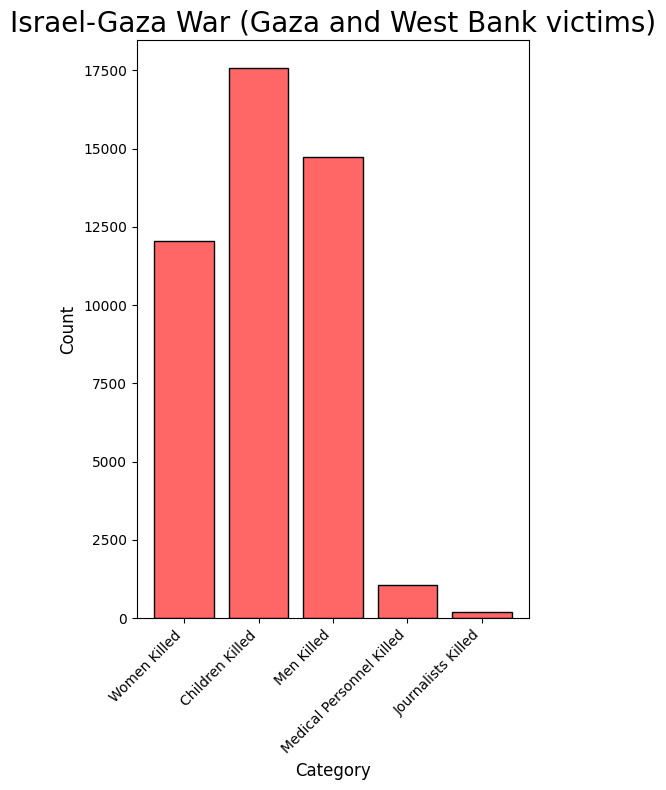

In [18]:
totals = {
    "Women Killed": total_women,
    "Children Killed": total_children,
    "Men Killed": total_men,
    "Medical Personnel Killed": total_med,
    "Journalists Killed": total_journalists
}
categories = list(totals.keys())
values = list(totals.values())
plt.figure(figsize=(5, 8))
plt.bar(categories, values, color='#FF6666', edgecolor='black')
plt.title('Israel-Gaza War (Gaza and West Bank victims)', fontsize=20)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

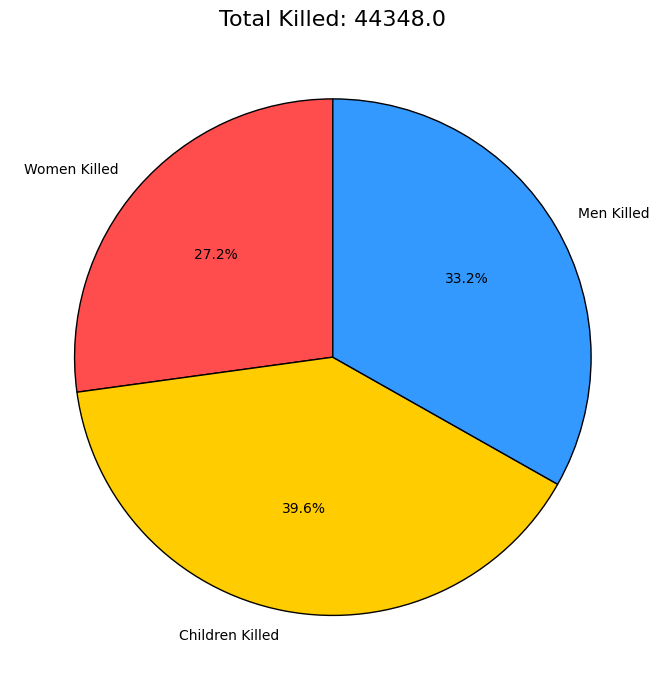

In [19]:

totals = {
    "Women Killed": total_women,
    "Children Killed": total_children,
    "Men Killed": total_men,
}
categories = list(totals.keys())
values = list(totals.values())
colors = ['#FF4D4D', '#FFCC00', '#3399FF', '#66CC66']
plt.figure(figsize=(7, 7))
plt.pie(values, labels=categories, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Total Killed: ' + str(total_killed), fontsize=16)
plt.tight_layout()
plt.show()


### Percentages

In [20]:
print(f'Of those who killed {total_women / total_killed * 100:.2f}% were women')
print(f'Of those who killed {total_children / total_killed * 100:.2f}% were children')
print(f'Of those who killed {total_men / total_killed * 100:.2f}% were men')
print(f'Of those who killed {total_med / total_killed * 100:.2f}% were medical personnel')
print(f'Of those who killed {total_journalists / total_killed * 100:.2f}% were journalists')

Of those who killed 27.17% were women
Of those who killed 39.64% were children
Of those who killed 33.19% were men
Of those who killed 2.37% were medical personnel
Of those who killed 0.44% were journalists


### Adding daily killed men column to the data

In [21]:
df['men_killed_daily'] = (df['ext_killed_daily'] - df['ext_killed_women_daily'] - df['ext_killed_children_daily']).apply(lambda x: x if x >= 0 else 0)

### Plotting killed people by categories

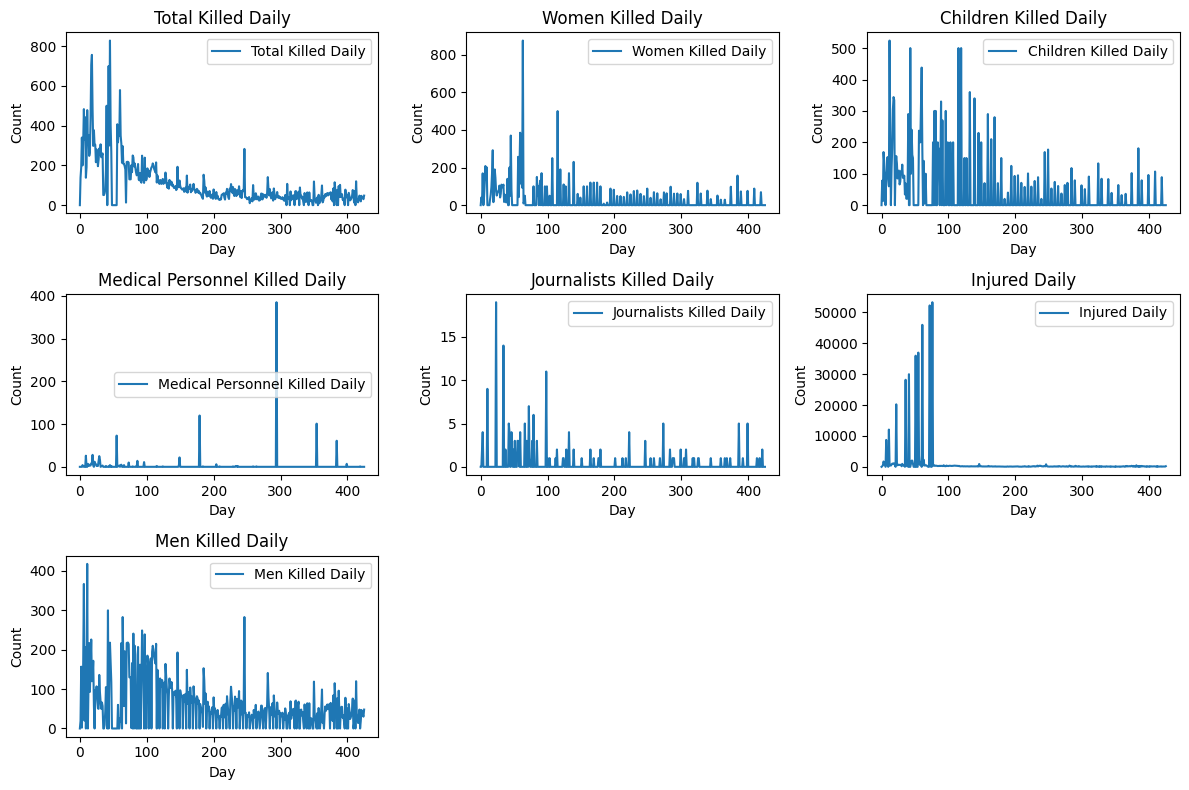

In [22]:
category_labels = {
    'ext_killed_daily': 'Total Killed Daily',
    'ext_killed_women_daily': 'Women Killed Daily',
    'ext_killed_children_daily': 'Children Killed Daily',
    'ext_med_killed_daily': 'Medical Personnel Killed Daily',
    'ext_press_killed_daily': 'Journalists Killed Daily',
    'injured_daily': 'Injured Daily',
    'men_killed_daily': 'Men Killed Daily'
}
categories = list(category_labels.keys())
plt.figure(figsize=(12, 8))
for i, category in enumerate(categories, 1):
    plt.subplot(3, 3, i)
    plt.plot(df[category], label=category_labels[category])
    plt.title(category_labels[category])
    plt.xlabel('Day')
    plt.ylabel('Count')
    plt.legend()
plt.tight_layout()
plt.show()

### What is the daily average number of people killed?

In [23]:
avg_killed_daily = df['ext_killed_daily'].mean()
print(f'Average number of people killed daily: {avg_killed_daily:.2f}')

Average number of people killed daily: 104.10


### What is the daily average number of women killed?

In [24]:
avg_women_killed = df['ext_killed_women_daily'].mean()
print(f'Average number of women killed daily: {avg_women_killed:.2f}')

Average number of women killed daily: 28.28


### What is the daily average number of children killed?

In [25]:
avg_children_killed = df['ext_killed_children_daily'].mean()
print(f'Average number of children killed daily: {avg_children_killed:.2f}')

Average number of children killed daily: 41.27


### What is the daily average number of medical personnel killed?

In [26]:
avg_med_killed = df['ext_med_killed_daily'].mean()
print(f'Average Number of medical personnel killed daily: {avg_med_killed:.2f}')

Average Number of medical personnel killed daily: 2.46


### What is the daily average number of journalists killed?

In [27]:
avg_journalists_killed = df['ext_press_killed_daily'].mean()
print(f'Average number of journalists killed daily: {avg_journalists_killed:.2f}')

Average number of journalists killed daily: 0.46


### What is the total number of deaths for the last 10 days?

In [28]:
last_10_days_killed = df['ext_killed_daily'].tail(10).sum()
print(f'Total killed in last 10 days: {last_10_days_killed}')

Total killed in last 10 days: 345.0


### What is the highest number of people killed in a single day?

In [29]:
max_killed_day = df['ext_killed_daily'].max()
print(f'Highest number of people killed in a single day: {max_killed_day}')

Highest number of people killed in a single day: 828.0


### On which day was the maximum number of people killed?

In [30]:
date_of_max_killed_day = df.loc[df['ext_killed_daily'] == max_killed_day, 'report_date']
print(f'Maximum number of people killed on day:\n{date_of_max_killed_day}')

Maximum number of people killed on day:
45   2023-11-21
Name: report_date, dtype: datetime64[ns]


### What is the trend of deaths over time (plot the number of people killed daily)?

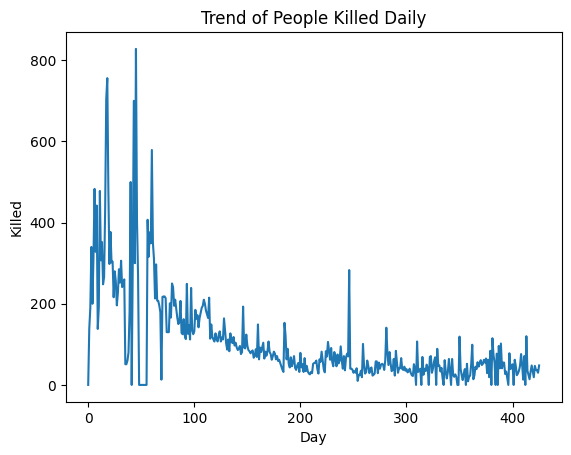

In [31]:
df['ext_killed_daily'].plot(title="Trend of People Killed Daily")
plt.xlabel('Day')
plt.ylabel('Killed')
plt.show()

### What is the correlation between women killed and total killed?

In [32]:
correlation_women_killed = df['ext_killed_women_daily'].corr(df['ext_killed_daily'])
print(f'Correlation between women killed and total killed: {correlation_women_killed:.2f}')

Correlation between women killed and total killed: 0.47


### What is the correlation between children killed and total killed?

In [33]:
correlation_children_killed = df['ext_killed_children_daily'].corr(df['ext_killed_daily'])
print(f'Correlation between children killed and total killed: {correlation_children_killed:.2f}')

Correlation between children killed and total killed: 0.55


### What is the average number of injured people per day?

In [34]:
avg_injured_daily = df['injured_daily'].mean()
print(f'Average number of injured people daily: {avg_injured_daily:.2f}')

Average number of injured people daily: 977.00


### What is the highest number of injuries in a single day?

In [35]:
max_injured_day = df['ext_injured_daily'].max()
print(f'Highest number of injuries in a single day: {max_injured_day}')

Highest number of injuries in a single day: 3652.0


### Which day had the most injuries?

In [36]:
date_of_max_injured_day = df.loc[df['ext_injured_daily'] == max_injured_day, 'report_date']
print(f'Maximum number of people injured on day:\n{date_of_max_injured_day}')

Maximum number of people injured on day:
56   2023-12-02
Name: report_date, dtype: datetime64[ns]
